<a href="https://colab.research.google.com/github/Larasati11/PCVK/blob/main/Modul5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage import io
import glob


In [10]:
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) **  2)
  if mse == 0:
    return 100
  PIXEL_MAX = 255.0
  return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

Gamma Correction pada citra
---------------------------
Masukkan nilai Gamma: 3


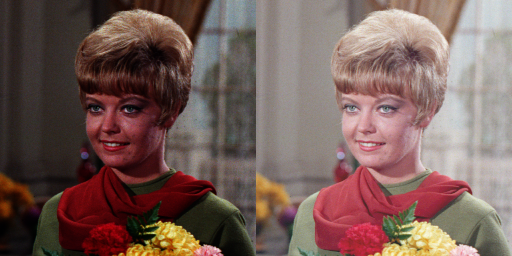

In [11]:
def adjust_gamma(image, gamma=1.0):
    # Membangun tabel lookup untuk nilai gamma yang disesuaikan
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")

    # Menerapkan gamma correction menggunakan tabel lookup
    return cv.LUT(image, table)

# create Gamma Collection according to the instructions

print('Gamma Correction pada citra')
print('---------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/female.tiff')

gamma_corrected = adjust_gamma(img, gamma=gamma)

final_frame = cv.hconcat([img, gamma_corrected])

cv2_imshow(final_frame)

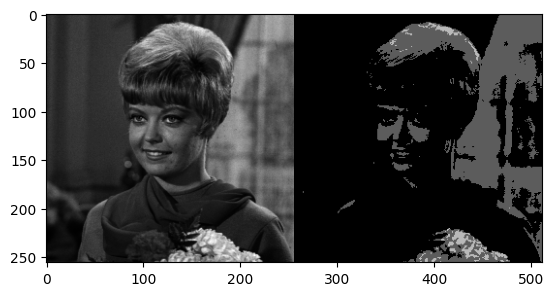

In [12]:
def bit_depther(image, levels):
    # Scale the image intensities to the new range and back
    normalized_img = np.floor(image / levels) * levels
    return np.uint8(normalized_img)

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = bit_depther(original, level)

final_frame = cv.hconcat([original, depth_image])

plt.imshow(final_frame, cmap='gray')
plt.axis('on')
plt.show()

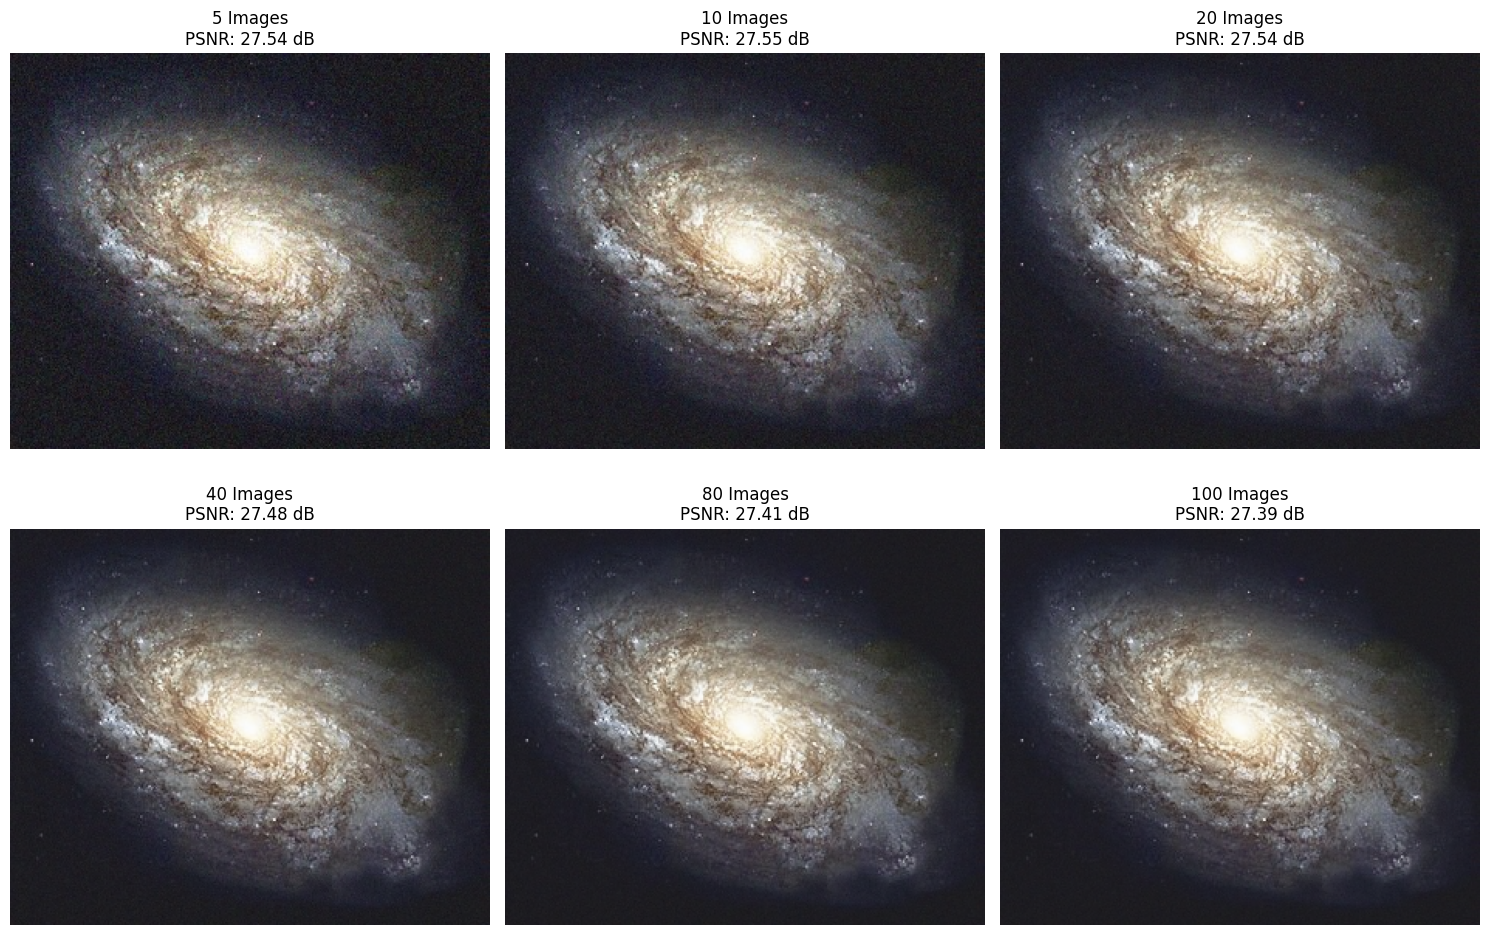

In [13]:
import glob
from math import log10, sqrt
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca citra asli
original_img = cv2.imread('/content/drive/MyDrive/pcvk/Assets/galaxy.jpg')

# Fungsi untuk menghitung PSNR antara dua gambar
def PSNR(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100  # Jika MSE adalah 0, gambar identik
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

# Membaca gambar dari folder menggunakan glob
cv_img = []
for img in glob.glob('/content/drive/MyDrive/pcvk/Assets/noises/*.jpg'):
    n = cv2.imread(img)
    if n is not None:
        cv_img.append(n)

# Memastikan ada gambar yang di-load
if len(cv_img) == 0:
    print("Tidak ada gambar yang ditemukan di folder '/content/drive/MyDrive/pcvk/Assets/noises/'")
    exit()

# Set parameter layout
rows = 2
cols = 3
test_images_counts = [5, 10, 20, 40, 80, 100]
fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

# Proses pengolahan gambar dan perhitungan PSNR
for index, num_images in enumerate(test_images_counts):
    # Pengecekan apakah jumlah gambar yang diminta lebih banyak dari yang tersedia
    if num_images > len(cv_img):
        print(f"Warning: Hanya {len(cv_img)} gambar yang tersedia, tidak cukup untuk {num_images} gambar.")
        continue

    average_img = np.zeros(cv_img[0].shape, np.float32)

    for i in range(num_images):
        average_img += cv_img[i].astype(np.float32)

    denoised_img = average_img / num_images
    denoised_img = cv2.convertScaleAbs(denoised_img)

    psnr_value = PSNR(original_img, denoised_img)

    row = index // cols
    col = index % cols

    axs[row, col].imshow(cv2.cvtColor(denoised_img, cv2.COLOR_BGR2RGB))
    axs[row, col].set_title(f'{num_images} Images\nPSNR: {psnr_value:.2f} dB')
    axs[row, col].axis('off')

# Menonaktifkan axis kosong
for idx in range(len(test_images_counts), rows * cols):
    row = idx // cols
    col = idx % cols
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


Dari hasil PSNR yang anda catat pada tabel diatas, kesimpulan yang dapat diambil adalah.

Jawab : Kesimpulan yang dapat diambil dari gambar diatas adalah semakin banyak gambar maka semakin kecil noisenya

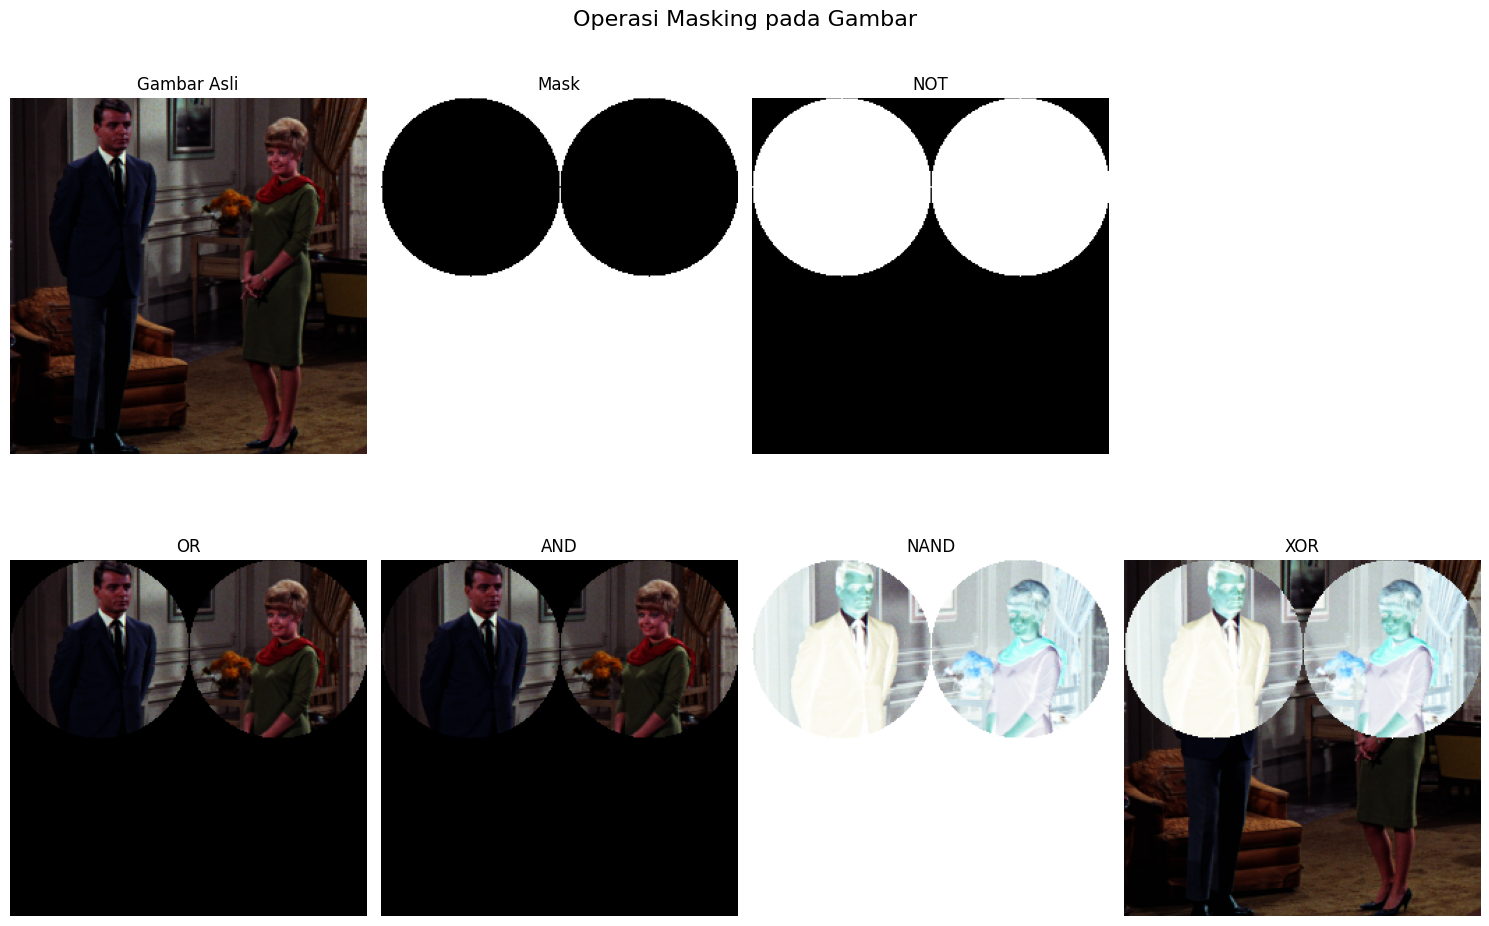

In [16]:
# Membaca gambar
img = cv2.imread('/content/drive/MyDrive/couple.tiff')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Mengubah format warna dari BGR ke RGB

# Membuat mask untuk operasi bitwise
mask = np.ones(img.shape[:2], dtype=np.uint8) * 255  # Membuat mask berbentuk matriks berukuran sama dengan gambar
# Menggambar dua lingkaran hitam (0) pada mask di posisi tertentu
cv2.circle(mask, (img.shape[1]//4, img.shape[0]//4), min(img.shape[0]//4, img.shape[1]//4), 0, -1)
cv2.circle(mask, (3*img.shape[1]//4, img.shape[0]//4), min(img.shape[0]//4, img.shape[1]//4), 0, -1)

# Operasi NOT pada mask
not_result = cv2.bitwise_not(mask)

# Operasi OR menggunakan gambar asli dengan mask yang telah di-inversi
or_result = cv2.bitwise_or(img, img, mask=cv2.bitwise_not(mask))

# Operasi AND menggunakan gambar asli dengan mask yang telah di-inversi
and_result = cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask))

# Operasi NAND, yaitu hasil AND kemudian di-inversi (NOT)
nand_result = cv2.bitwise_not(cv2.bitwise_and(img, img, mask=cv2.bitwise_not(mask)))

# Operasi XOR antara gambar asli dan mask yang diubah ke format RGB
xor_result = cv2.bitwise_xor(img, cv2.cvtColor(cv2.bitwise_not(mask), cv2.COLOR_GRAY2RGB))

# Membuat grid untuk menampilkan gambar
fig, axs = plt.subplots(2, 4, figsize=(15, 10))  # 2 baris dan 4 kolom
fig.suptitle('Operasi Masking pada Gambar', fontsize=16)

# Menampilkan gambar dan hasil operasi bitwise pada plot
axs[0, 0].imshow(img)  # Menampilkan gambar asli
axs[0, 0].set_title('Gambar Asli')
axs[0, 1].imshow(mask, cmap='gray')  # Menampilkan mask
axs[0, 1].set_title('Mask')
axs[0, 2].imshow(not_result, cmap='gray')  # Menampilkan hasil operasi NOT
axs[0, 2].set_title('NOT')
axs[1, 0].imshow(or_result)  # Menampilkan hasil operasi OR
axs[1, 0].set_title('OR')
axs[1, 1].imshow(and_result)  # Menampilkan hasil operasi AND
axs[1, 1].set_title('AND')
axs[1, 2].imshow(nand_result)  # Menampilkan hasil operasi NAND
axs[1, 2].set_title('NAND')
axs[1, 3].imshow(xor_result)  # Menampilkan hasil operasi XOR
axs[1, 3].set_title('XOR')

# Menghapus axis pada setiap subplot agar lebih bersih
for ax in axs.flat:
    ax.axis('off')

# Menampilkan semua gambar dalam layout yang rapi
plt.tight_layout()
plt.show()


Tuliskan hasil analisa anda:
Operasi bitwise yang dilakukan meliputi NOT, OR, AND, NAND, dan XOR, yang masing-masing menghasilkan perubahan visual berbeda pada gambar berdasarkan mask. Hasil NOT membalikkan mask, OR mempertahankan sebagian besar gambar kecuali area lingkaran, AND menampilkan gambar di luar lingkaran, NAND membalik hasil AND, dan XOR menonjolkan perbedaan antara gambar asli dan mask. Semua hasil divisualisasikan, menunjukkan bagaimana mask memengaruhi gambar dengan fleksibilitas tinggi untuk manipulasi gambar.